In [1]:
from c_tunePara import *
from d_visualization import *

In [2]:
dir = os.getcwd()
os.chdir(dir)
os.makedirs("model_result", exist_ok = True)

In [3]:
####### only used for muraro to match the gene name between network and gene expression data
def findchr(chr):
    if '-' in chr:
        chr = chr.replace('-','.')
    if '__' in chr:
        chr = chr[:chr.find('__')]
    return chr

In [4]:
dataname = "muraro"
data = pd.read_csv("data/{dataname}_data.csv".format(dataname=dataname), index_col=0)
data.index = list(map(findchr, data.index))       ####### only used for muraro

label = np.load("data/{dataname}_label.npy".format(dataname=dataname))
# label = pd.read_csv("data/{dataname}_label.csv".format(dataname=dataname), index_col = 0)
# label = np.array(list(label['labels']))

In [5]:
model = TUNE(data, label, dataname=dataname)

In [ ]:
## NetworkSSC
networkssc_result = model.networkSSCTune(network_lambda1 = [1000], network_lambda2 = [1000], d = 400)
print(model.extractMax(networkssc_result, "NMI"))   ## select the best parameters based on NMI
print(model.extractMax(networkssc_result, "RI"))    ## select the best parameters based on ARI

In [6]:
## SSC
ssc_result = model.standardSSCTune(ssc_lambda1=[10, 100], ssc_lambda2=[10, 100])
print(model.extractMax(ssc_result, "NMI"))
print(model.extractMax(ssc_result, "RI"))

  0%|          | 0/4 [00:00<?, ?it/s]/usr/local/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:259: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
 50%|█████     | 2/4 [01:15<01:08, 34.20s/it]/usr/local/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:259: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
100%|██████████| 4/4 [02:35<00:00, 38.96s/it]

   alpha1  alpha2       NMI        RI
3     100     100  0.704435  0.719782
   alpha1  alpha2       NMI        RI
3     100     100  0.704435  0.719782


In [9]:
## Adaptive SSC
adaptive_result = model.adaptiveSSCTune(adaptive_lambda=[0.1, 1])
print(model.extractMax(adaptive_result, "NMI"))
print(model.extractMax(adaptive_result, "RI"))

100%|██████████| 2/2 [00:05<00:00,  2.53s/it]

   alpha       NMI        RI
0    0.1  0.570875  0.581737
1    1.0  0.570875  0.581737
   alpha       NMI        RI
0    0.1  0.570875  0.581737
1    1.0  0.570875  0.581737


In [7]:
## KMeans
kmeans_result = model.kmeansResult()
print(kmeans_result)

(0.15102618691294462, 0.11728711148295197)


/usr/local/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default lea

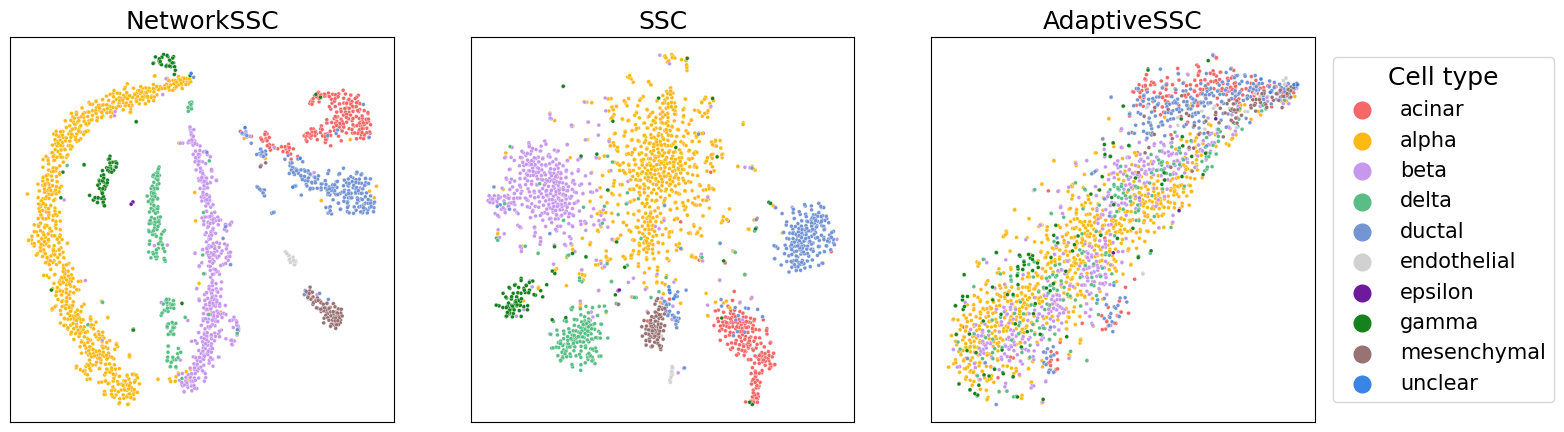

In [6]:
## Visualize clustering results by T-SNE
network_w = np.load("model_result/{dataname}/networkSSC_W_1000_1000_400.npy".format(dataname=dataname))
ssc_w = np.load("model_result/{dataname}/SSC_W_100_100.npy".format(dataname=dataname))
adaptive_w = np.load("model_result/{dataname}/adaptiveSSC_W_1.npy".format(dataname=dataname))

tsnePlot(network_w, ssc_w, adaptive_w, label, dataname)